In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('encoded_dataset.csv')
df = pd.DataFrame(data)

In [3]:
df

,Immobile a reddito,Piano,Piani edificio,Ascensore,Superficie,Locali,Camere da letto,Bagni,Terrazzo,Prezzo,...,alimentazione elettrica,a pavimento,alimentato a metano,alimentato a gpl,Cucina a vista,Cucina abitabile,Cucina angolo cottura,Cucina assente,Cucina cucinotto,Cucina semi abitabile
0,0,3.0,3,1,50,2,1,1,1,139000,...,0,0,1,0,0,0,1,0,0,0
1,0,0.0,2,0,28,1,1,1,0,84000,...,1,0,0,0,0,0,1,0,0,0
2,0,1.0,7,1,80,3,2,2,1,139000,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,4,1,103,3,2,2,1,129000,...,0,0,0,0,0,1,0,0,0,0
4,1,-2.0,3,0,32,2,1,1,0,79000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,1,6.0,6,1,55,1,0,1,1,398000,...,0,0,0,0,1,0,0,0,0,0
19379,0,2.0,4,0,74,3,2,1,0,169000,...,0,0,1,0,0,1,0,0,0,0
19380,0,1.0,2,0,60,2,1,1,0,79000,...,0,0,1,0,0,0,0,0,0,1
19381,0,2.0,3,0,100,4,3,2,0,255000,...,0,0,1,0,0,1,0,0,0,0


In [4]:
X = df.drop(columns=['Prezzo'])
y = df['Prezzo']

In [22]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=.2, random_state=4)

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=.25, random_state=42)

In [7]:
print("Train set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_val.shape, y_val.shape)
print("Test set size:", X_test.shape, y_test.shape)

Train set size: (11629, 65) (11629,)
Validation set size: (3877, 65) (3877,)
Test set size: (3877, 65) (3877,)


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)

In [10]:
rfr.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [11]:
y_val_pred = rfr.predict(X_val)

mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 74107.52165325831
Root Mean Squared Error (RMSE): 104385.3799736551
R² Score: 0.636448396750222


In [12]:
y.mean()

329966.4944539029

In [13]:
mae / y.mean() * 100

22.459105060320393

In [14]:
# from sklearn.model_selection import KFold

In [15]:
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

In [16]:
from sklearn.model_selection import cross_val_score

In [27]:
from sklearn.model_selection import KFold

In [38]:
kf = KFold(n_splits=5, shuffle=True)

In [39]:
scores = cross_val_score(rfr, X, y, cv=kf, scoring='neg_mean_absolute_error')

In [40]:
-scores.mean()

74882.6535764803

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [10, 20, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
randomized_search = RandomizedSearchCV(rfr, param_grid, cv=5, scoring='neg_mean_absolute_error')
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [10, 20, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='neg_mean_absolute_error')

In [47]:
randomized_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None}

In [49]:
-randomized_search.best_score_

75025.20795227357

In [50]:
importances = randomized_search.best_estimator_.feature_importances_

In [51]:
importances

array([3.68065961e-03, 3.64493351e-02, 5.12562746e-02, 4.77959022e-02,
       4.74368865e-01, 1.87384797e-02, 1.63125046e-02, 2.31520077e-02,
       1.03517016e-02, 1.60013931e-02, 1.33613051e-02, 1.76900778e-02,
       1.00030645e-02, 8.81339560e-02, 1.84940445e-02, 2.13337715e-03,
       1.61021073e-04, 4.95728742e-06, 1.38883271e-05, 5.07371091e-03,
       2.34158272e-05, 2.34589927e-06, 1.09468823e-04, 1.23061384e-02,
       1.80751099e-03, 8.54779629e-06, 4.83366323e-03, 2.57433827e-02,
       5.31419436e-04, 3.64902715e-03, 8.55362509e-04, 5.01394463e-04,
       2.68219871e-04, 1.16013987e-06, 6.40289470e-03, 1.83416218e-04,
       3.42671649e-03, 1.35769044e-03, 1.64470453e-03, 2.62449714e-04,
       1.42037811e-04, 5.43065612e-03, 1.47233477e-03, 6.52183013e-03,
       2.02847703e-04, 3.06987958e-04, 9.07330242e-04, 6.30289434e-03,
       2.19597659e-03, 2.02204358e-03, 5.45392517e-05, 2.98853141e-06,
       2.42339203e-03, 6.68507647e-04, 8.31983215e-03, 2.54202588e-03,
      

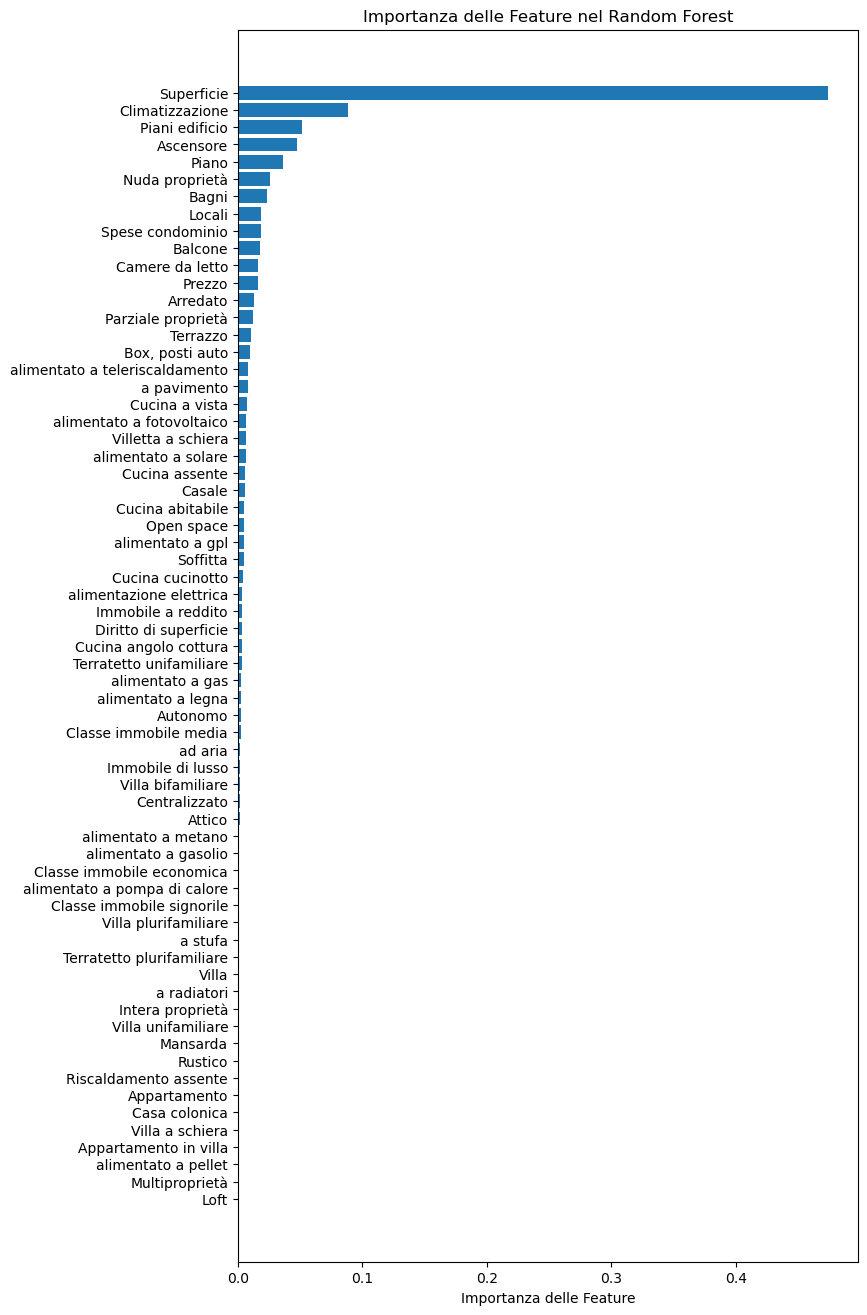

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Supponiamo di avere un esempio fittizio per le importanze delle feature e i nomi delle feature
feature_importances = randomized_search.best_estimator_.feature_importances_  # Sostituisci con randomized_search.best_estimator_.feature_importances_
feature_names = list(df.columns)  # Sostituisci con il nome delle tue feature

# Ordina le feature per importanza
indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_feature_importances = [feature_importances[i] for i in indices]

# Visualizza un grafico a barre
plt.figure(figsize=(8, 16))
plt.barh(sorted_feature_names, sorted_feature_importances, align='center')
plt.xlabel('Importanza delle Feature')
plt.title('Importanza delle Feature nel Random Forest')
plt.gca().invert_yaxis()  # Inverti l'asse Y per avere la feature più importante in alto
plt.show()
